In [1]:
#importing the dependences required 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [3]:
# understanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# accessing data attributes 
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)


CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [6]:
#reshaping data 
data = dataset[:,12].reshape(-1,1)

In [7]:
# shape of the data
np.shape(dataset)

(506, 13)

In [8]:
# target value 
target = boston.target.reshape(-1,1)

In [9]:
# shape of target site 
np.shape(target)

(506, 1)

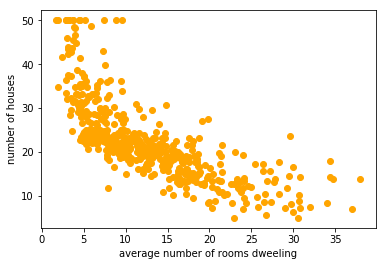

In [11]:
#ensuring that matplotlib is working inside the notebook
%matplotlib inline 
plt.scatter(data,target,color = 'orange')
plt.xlabel('average number of rooms dweeling')
plt.ylabel('number of houses')
plt.show()

In [14]:
#regression
from sklearn.linear_model import LinearRegression
                                                 # from sklearn.linear_model import ridge
                                                 #from sklearn.linear_model import lasso
# creating a regression model

reg = LinearRegression()

                                                   #reg = ridge
                                                   # reg= lasso

#fit the model 
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
#prediction
pred = reg.predict(data)

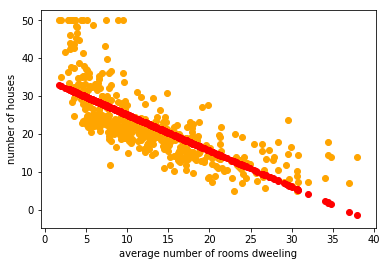

In [18]:
#ensuring that matplotlib is working 
%matplotlib inline 
plt.scatter(data,target,color = 'orange')
plt.scatter(data,pred,color = 'red')
plt.xlabel('average number of rooms dweeling')
plt.ylabel('number of houses')
plt.show()

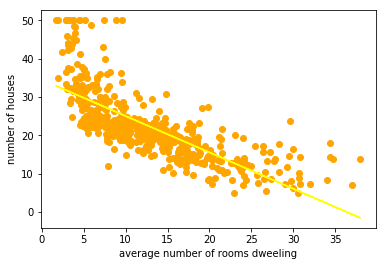

In [24]:
%matplotlib inline 
plt.scatter(data,target,color = 'orange');
plt.plot(data,pred,color='yellow')
plt.xlabel('average number of rooms dweeling')
plt.ylabel('number of houses')
plt.show()

In [27]:
# circumventing the curve using polynomail model 
from sklearn.preprocessing import PolynomialFeatures

# to allow mergeing of the model 
from sklearn.pipeline import make_pipeline

In [40]:
model = make_pipeline( PolynomialFeatures(10),reg)

In [30]:
model.fit(data, target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [34]:
pred = model.predict(data)

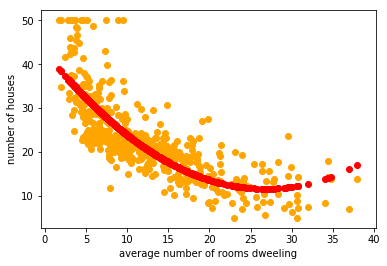

In [35]:
%matplotlib inline 
plt.scatter(data,target,color = 'orange')
plt.scatter(data,pred,color = 'red')
plt.xlabel('average number of rooms dweeling')
plt.ylabel('number of houses')
plt.show()

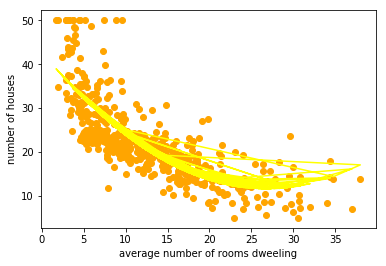

In [41]:
%matplotlib inline 
plt.scatter(data,target,color = 'orange')
plt.plot(data,pred,color = 'yellow')
plt.xlabel('average number of rooms dweeling')
plt.ylabel('number of houses')
plt.show()

In [44]:
# r_2 matrix 
from sklearn.metrics import r2_score

In [45]:
# predict
r2_score(pred, target)

0.4392482788782167